In [1]:
import torchOptics.optics as tt
import warnings 
warnings.filterwarnings('ignore') ## ignore warnings

In [2]:
meta = {'wl':(638e-9, 515e-9, 450e-9), 'dx': (6.3e-6, 6.3e-6)}
timg = tt.imread('frog.png', meta=meta)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



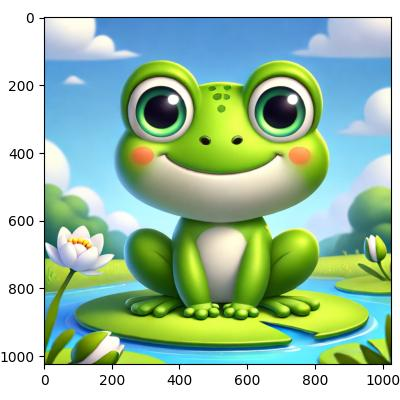
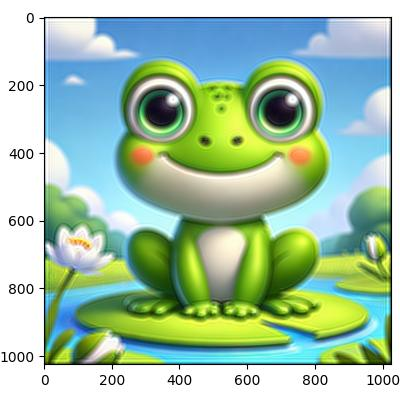
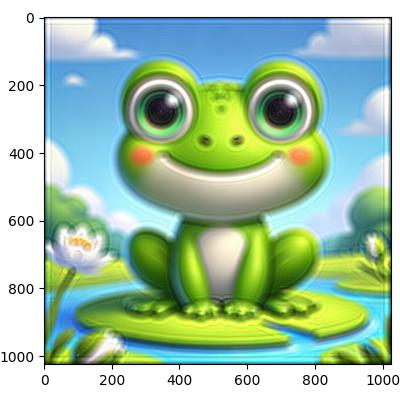

In [3]:
tt.show(tt.simulate(timg, 0), figsize=(4,4))
tt.show(tt.simulate(timg, 10e-3), figsize=(4,4))
tt.show(tt.simulate(timg, 20e-3), figsize=(4,4))

In [24]:
import torch.nn as nn
import torch

field = timg.clone()
field.requires_grad = True
optimizer = torch.optim.Adam([field], lr=0.0001) # 학습률이라는 상관 없는것 같음
criterion = torch.nn.MSELoss()
for i in range(1000):
    optimizer.zero_grad()
    ## loss function
    sim = tt.simulate(field, 20e-3,).abs()**2
    loss = criterion(sim, timg)
    loss.backward()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



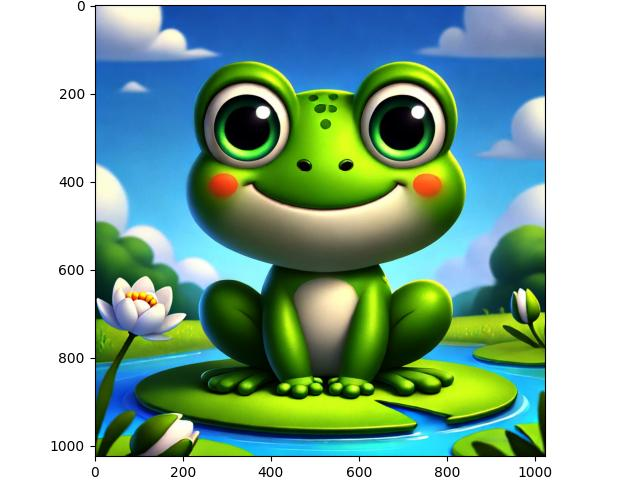
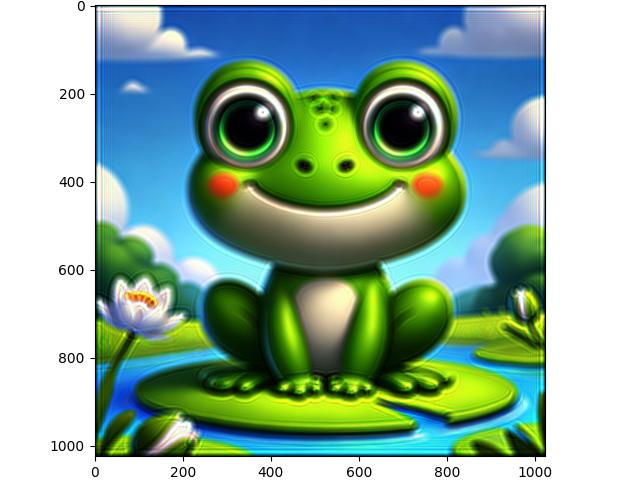
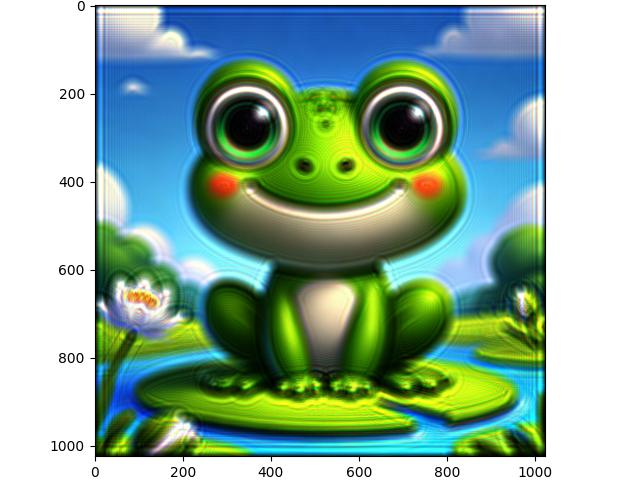

In [26]:
tt.show(tt.simulate(field, 0,).abs()**2)
tt.show(tt.simulate(field, 10e-3,).abs()**2)
tt.show(tt.simulate(field, 20e-3,).abs()**2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



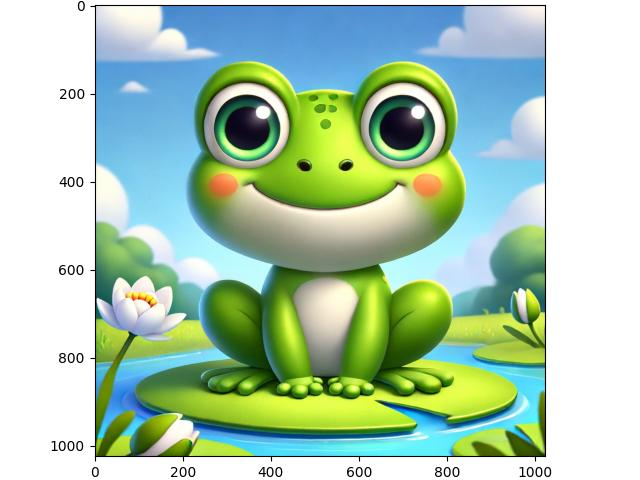
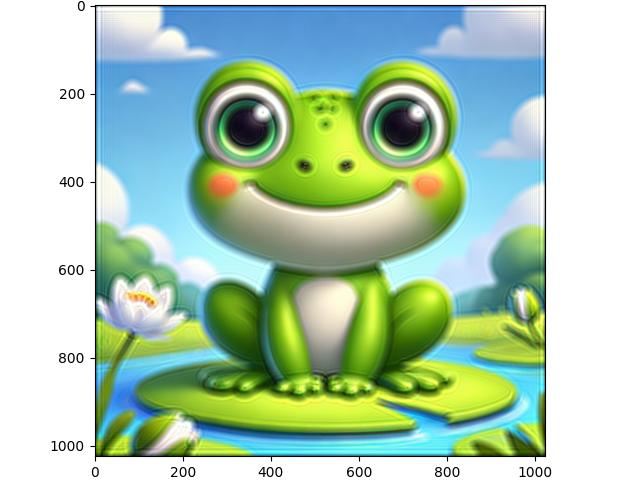
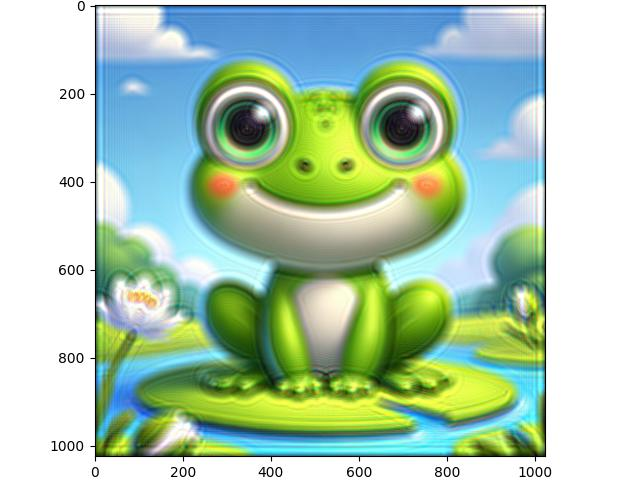

In [27]:
tt.show(tt.simulate(field, 0,).abs())
tt.show(tt.simulate(field, 10e-3,).abs())
tt.show(tt.simulate(field, 20e-3,).abs())
# 시뮬레이션 된 필드의 값이 0과 1 사이에 있는경우 절대값 제곱을 하면 이미지가 어두워지는 현상이 발생
# 각 픽셀의 진폭 값이 작아져서 그렇게 되는것

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



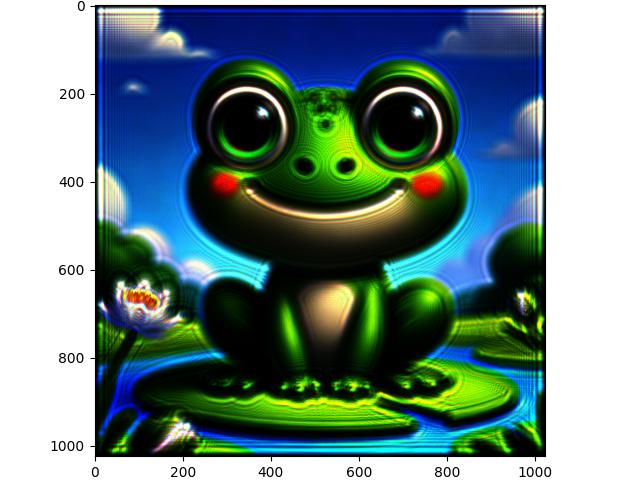
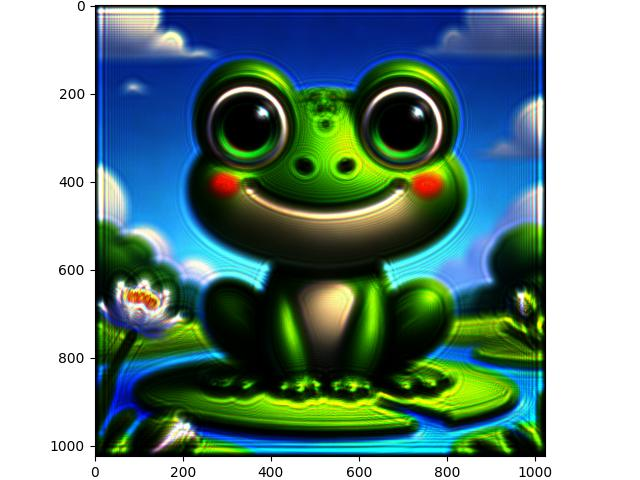
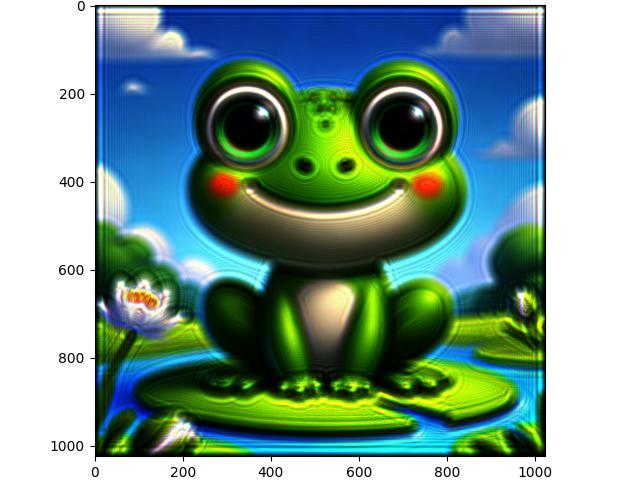
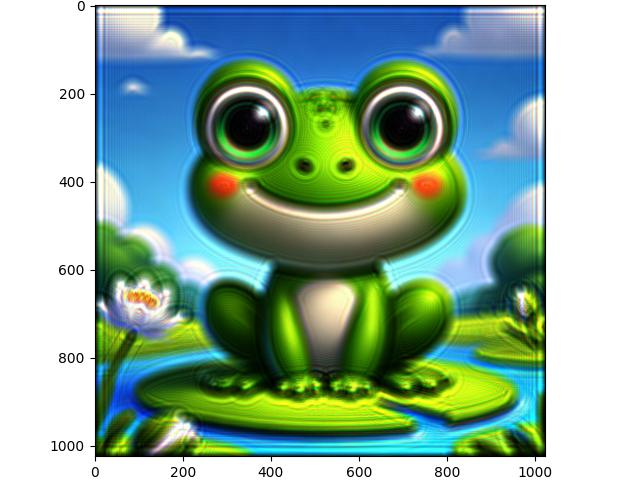
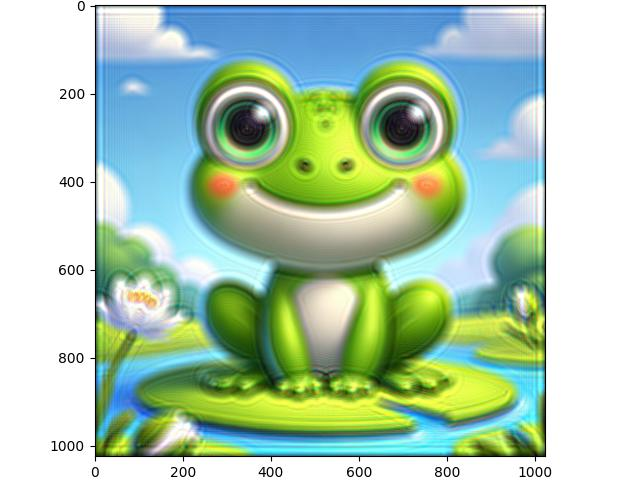

In [28]:
tt.show(tt.simulate(field, 20e-3,).abs()**5)
tt.show(tt.simulate(field, 20e-3,).abs()**4)
tt.show(tt.simulate(field, 20e-3,).abs()**3)
tt.show(tt.simulate(field, 20e-3,).abs()**2)
tt.show(tt.simulate(field, 20e-3,).abs()**1)

In [29]:
import torch.nn as nn
import torch
import torch.nn.functional as F
def loss_func(field, z, timg):
    sim = tt.simulate(field, z,).abs()**2
    loss = F.mse_loss(sim, timg)
    return loss

field = timg.clone()
# 자동 최적화 함수
r = tt.optimizer(field, loss_func, 20e-3, timg)

0.0016318606212735176: 100%|██████████| 500/500 [00:05<00:00, 91.84it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


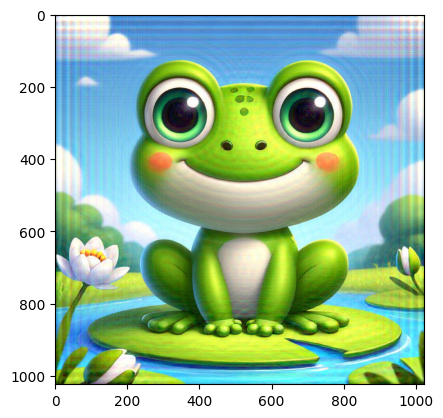

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [34]:
tt.simulate(r[0], 20e-3,).abs()**2
# 내부적으로 반복 횟수와 최적화 과정 관리
# 내부적 최적화 ->  이미지 밝아짐?
# 손실을 최소화?